In [1]:
!pip install tensorflow==2.0.0 -q

     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 450kB 52.3MB/s 
     |████████████████████████████████| 3.8MB 65.0MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalMaxPool1D, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-03-28 06:58:05--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   709KB/s    in 0.7s    

2020-03-28 06:58:07 (709 KB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [0]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df = df.rename(columns={'v1':'label', 'v2':'Data'})

In [25]:
df.head()

,label,Data,b_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
df['b_label'] = df['label'].replace({'ham':0,'spam':1})
Y = df['b_label'].values

In [27]:
df.head()

,label,Data,b_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['Data'], Y, test_size=0.33)

In [0]:
#Tokenizing the sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [38]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V)

7260


In [0]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]

In [40]:
data_train.shape

(3733, 189)

In [42]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1839, 189)

In [0]:
#Creating the model
M = 15
D = 20

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [47]:
r = model.fit(data_train, Ytrain, validation_data=(data_test, Ytest), epochs=10)

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 12s 3ms/sample - loss: 0.4758 - accuracy: 0.8411 - val_loss: 0.4129 - val_accuracy: 0.8548
Epoch 2/10
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.3765 - accuracy: 0.8714 - val_loss: 0.3919 - val_accuracy: 0.8548
Epoch 3/10
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.3066 - accuracy: 0.8714 - val_loss: 0.2842 - val_accuracy: 0.8548
Epoch 4/10
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.2222 - accuracy: 0.8714 - val_loss: 0.2062 - val_accuracy: 0.8548
Epoch 5/10
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.1470 - accuracy: 0.9574 - val_loss: 0.1464 - val_accuracy: 0.9636
Epoch 6/10
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.0932 - accuracy: 0.9890 - val_loss: 0.1144 - val_accuracy: 0.9777
Epoch 7/10
3733/3733 [==============================] - 9s 2ms/sample - los

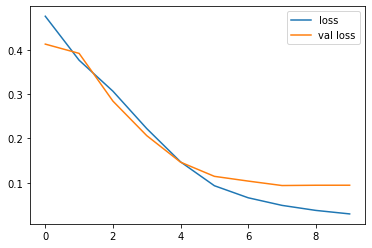

In [48]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

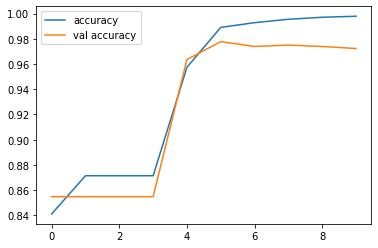

In [49]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()